<a href="https://colab.research.google.com/github/kanedc/Learning_Pytorch/blob/main/01_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow

pytorch 端到端工作流程

In [41]:
what_were_covering = {1:"数据 (准备和加载)",
            2:"构建模型",
            3:"将模型拟合到数据(训练)",#利用数据训练模型，让模型学会数据的规律
            4:"做预测并评估模型(推理)",
            5:"保存并加载模型",
            6:"把他们放在一起"}
what_were_covering

{1: '数据 (准备和加载)',
 2: '构建模型',
 3: '将模型拟合到数据(训练)',
 4: '做预测并评估模型(推理)',
 5: '保存并加载模型',
 6: '把他们放在一起'}

In [42]:
import torch
from torch import nn
import matplotlib.pyplot as plt #Python 的一个绘图库

torch.__version__

'2.6.0+cu124'

##数据（准备和装载）

在机器学习领域，数据可以使任何东西



*   表格
*   任何类型的图片
*   视频
*   音频
*   文本
*   DNA

机器学习一场由两部分组成的游戏：

  1.把数据转化为数值表示（把现实世界中各种非数值类型的数据（如文本、图片、音频、类别标签等）转化为神经网络可以处理的数值形式（通常是向量或矩阵）

  2.构建一个模型用来那些学习数值表示中的模式或规律


使用线性归回公式制作一条已知参数的直线




In [43]:
#创建已知参数
weight = 0.7
bias = 0.3

#创建数据
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [44]:
len(X),len(y)

(50, 50)

###拆分数据到训练和测试集（一般来说在机器学习中最重要的概念之一）

使用数据创建一个训练集和测试集

In [45]:
#创建训练集和测试集的划分

train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [46]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

我们应该怎么更好的可视化我们的数据

In [47]:
def plot_predictions( train_data=X_train,
            train_labels=y_train,
            test_data=X_test,
            test_labels=y_test,
            predictions=None):
  """
  绘制训练数据，测试数据 并且比较预测值
  """
  plt.figure(figsize=(10,7))#创建图形窗口
  #用蓝色绘制训练数据
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")

  #用绿色绘制测试数据
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")

  if predictions is not None:
    #用红色绘制预测数据
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  plt.legend(prop={"size":14})#显示图例

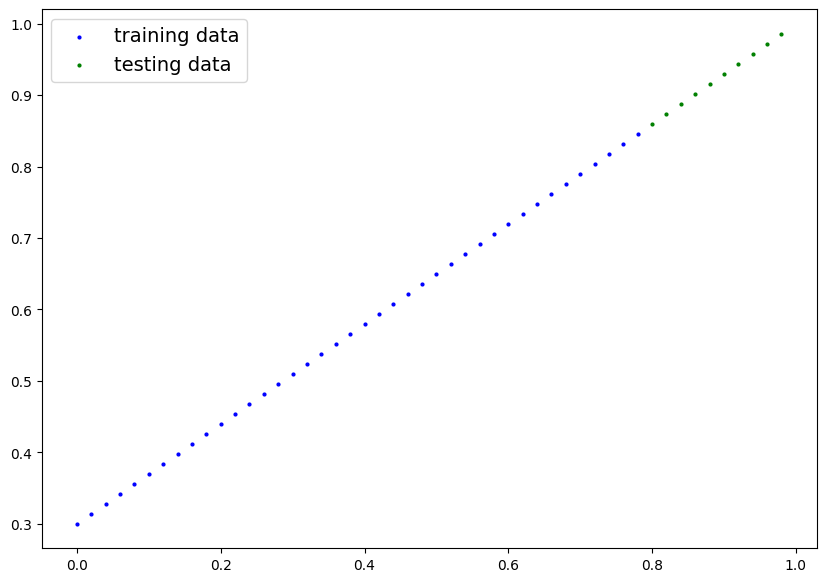

In [48]:
plot_predictions()

##构建模型

我们的模型做了什么：

  * 从随机值开始（weight和bias）

  * 查看训练数据并调整随机值以更好地表示（或者接近）理想值（我们用于创建数据的权重和偏置差）

它如何做到：
  * 梯度下降
  * 反向传播


In [49]:
from torch import nn

#创建线性回归模型类
class LinearRegressionModel(nn.Module):#在PyTorch中几乎所有都继承自nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                        requires_grad = True,#跟踪梯度
                        dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                       requires_grad=True, #跟踪梯度
                       dtype = torch.float))

  #forward方法来定义模型中的计算
  def forward(self,x: torch.Tensor)->torch.Tensor:# "x"是输入
    return self.weights * x + self.bias #这是线性回归公式


In [50]:
#由于nn.Parameter是随机初始化的，因此需要设置manual_seed
torch.manual_seed(37)

#实例化模型
model_0 = LinearRegressionModel()

#在我们创建的nn.Module的子类中中检查nn.Parameter(s)
list(model_0.parameters())

[Parameter containing:
 tensor([0.7911], requires_grad=True),
 Parameter containing:
 tensor([0.6419], requires_grad=True)]

In [51]:
model_0,model_0.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weights', tensor([0.7911])), ('bias', tensor([0.6419]))]))

本质上，我们想要从随机参数（randn()）开始，并让模型更新参数,以=使其寻找到最合适我们的数据的参数

In [52]:
#使用模型做预测

#inference_mode()用于使用模型进行推理
with torch.inference_mode():
  y_preds = model_0(X_test)



inference_mode()会关闭一些东西以至于更快的正向传播（比如梯度跟踪，在训练时是必要的但在推理时不是）

In [53]:
#检查预测值
print(f"Number of testing samples:{len(X_test)}")
print(f"Number of predictions made:{len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples:10
Number of predictions made:10
Predicted values:
tensor([[1.2748],
        [1.2906],
        [1.3064],
        [1.3222],
        [1.3381],
        [1.3539],
        [1.3697],
        [1.3855],
        [1.4014],
        [1.4172]])


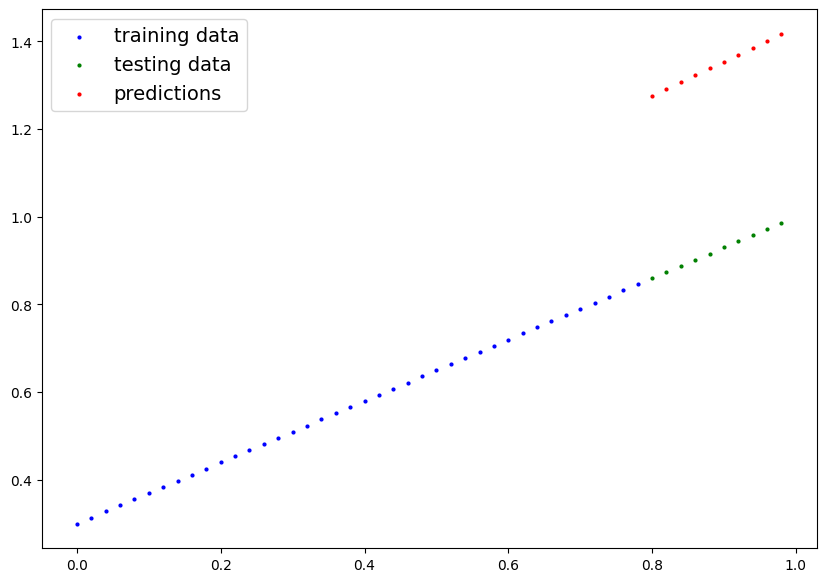

In [54]:
plot_predictions(predictions = y_preds)

In [55]:
y_test - y_preds

tensor([[-0.4148],
        [-0.4166],
        [-0.4184],
        [-0.4202],
        [-0.4221],
        [-0.4239],
        [-0.4257],
        [-0.4275],
        [-0.4294],
        [-0.4312]])

###损失函数和优化器

损失函数---衡量模型预测值与标签真实值之间的误差程度。误差越低越好 :
 （torch.nn.L1Loss 回归问题的平均绝对误差：
 torch.nn.BCELoss 二元分类问题的二元交叉熵
 ）


 优化器---告诉模型如何更新其内部参数以最大程度地降低损失。

In [56]:
##创建一个损失函数
loss_fn = nn.L1Loss() #MAE(平均绝对误差)和L1Loss相同

#创建一个优化器
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)
#learning rate 学习率，优化器在每个步骤（每一步）中参数的改变幅度，越高=越多（越不稳定）
#，越低=越少（可能需要很长时间）

###Pytorch training loop

为了training loop,我们将构建以下几个步骤:


*   正向传输---pred=model(x)--执行forward()方法
*   计算损失值--loss=loss_fn(pred,y)
*   梯度重置---optimizer.zreo_gred()---梯度默认累计，梯度置零为了在正向传输重新开始
*   对损失进行反向传输---loss.backward()--在损失函数上执行反向传输
*   更新优化器---optimizer.step()---使用相对于loss.backward()计算出的梯度来更新模型参数

In [57]:
torch.manual_seed(66)
#设置轮次数
epochs=100

#创建空损失列表以跟踪值
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ###训练

  #将模型置于训练模式
  model_0.train()

  #1正向传输使用内部forward()方法训练数据
  y_pred=model_0(X_train)

  #计算损失值
  loss=loss_fn(y_pred,y_train)

  #优化器梯度置零
  optimizer.zero_grad()

  #损失反向传输
  loss.backward()

  #推进优化器
  optimizer.step()

  ###测试

  #将模型置于评估模式
  model_0.eval()

  with torch.inference_mode():
    #测试数据的正向传输
    test_pred=model_0(X_test)

    #测试数据上计算损失
    test_loss=loss_fn(test_pred,y_test.type(torch.float))

    #打印日志
    if epoch % 10 == 0:
      epoch_count.append(epoch)

      #.detach()方法用于从计算图中分离张量。
      #作用是创建一个新张量，这个张量与原始张量共享数据，
      #但不再与原始张量相关的计算图关联。
      train_loss_values.append(loss.detach().numpy())
      #loss.detach().numpy() 从loss张量中分离出新张量并将其转为Numpy数组

      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch:{epoch} | MAE Train Loss:{loss} | MAE Test Loss:{test_loss}")


Epoch:0 | MAE Train Loss:0.3774084150791168 | MAE Test Loss:0.40950289368629456
Epoch:10 | MAE Train Loss:0.2621985375881195 | MAE Test Loss:0.2747930884361267
Epoch:20 | MAE Train Loss:0.1469886600971222 | MAE Test Loss:0.14008323848247528
Epoch:30 | MAE Train Loss:0.03177879750728607 | MAE Test Loss:0.005373412277549505
Epoch:40 | MAE Train Loss:0.004689675755798817 | MAE Test Loss:0.01044414658099413
Epoch:50 | MAE Train Loss:0.0020479790400713682 | MAE Test Loss:0.00435184221714735
Epoch:60 | MAE Train Loss:0.005474783480167389 | MAE Test Loss:0.00435184221714735
Epoch:70 | MAE Train Loss:0.005474783480167389 | MAE Test Loss:0.00435184221714735
Epoch:80 | MAE Train Loss:0.005474783480167389 | MAE Test Loss:0.00435184221714735
Epoch:90 | MAE Train Loss:0.005474783480167389 | MAE Test Loss:0.00435184221714735


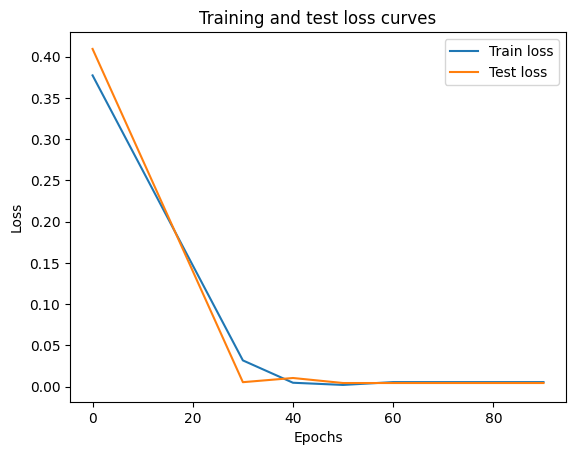

In [58]:
plt.plot(epoch_count,train_loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()#添加图例到图表

In [59]:
#找到我们模型的学习参数
print("The model learned the following values for weight and bias:")
print(model_0.state_dict())

print("\n")
print(list(model_0.parameters()))

print("\nAnd the original values for weights and bias are:")
print(f"weights:{weight},bias:{bias}")

The model learned the following values for weight and bias:
OrderedDict([('weights', tensor([0.6927])), ('bias', tensor([0.2974]))])


[Parameter containing:
tensor([0.6927], requires_grad=True), Parameter containing:
tensor([0.2974], requires_grad=True)]

And the original values for weights and bias are:
weights:0.7,bias:0.3


In [60]:
#print(y_preds,test_pred)
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8515],
        [0.8654],
        [0.8792],
        [0.8931],
        [0.9070],
        [0.9208],
        [0.9347],
        [0.9485],
        [0.9624],
        [0.9762]])

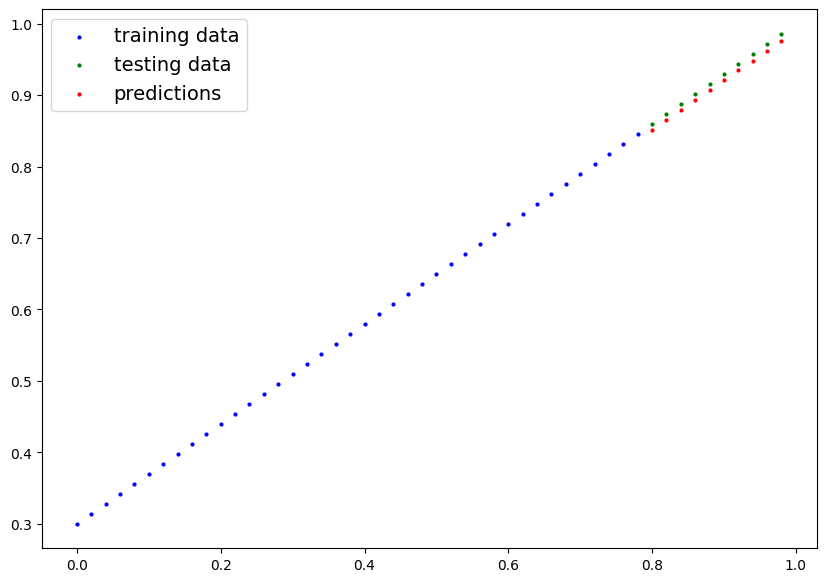

In [61]:
plot_predictions(predictions=y_preds)

###保存PyTorch模型的state_dict()




In [62]:
from pathlib import Path

#创建模型字典
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#创建模型保存路径
MODEL_NAME="01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

#保存模型状态字典
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),#仅保存state_dict()仅保存模型学习参数
      f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [63]:
#检查保存文件路径
!ls -l models/01_pytorch_workflow_model.pth

-rw-r--r-- 1 root root 1668 Jul 27 19:17 models/01_pytorch_workflow_model.pth


###加载已保存的Pytorch模型的state_dict()

使用torch.nn.Module.load_state_dict(torch.load(f))来加载保存的模型，f是我们保存的模型state_dict()的文件路径



In [64]:
#实例化一个新实例化模型（这将使用随机权重实例化）
loaded_model_0 = LinearRegressionModel()

#加载我们保存的模型的state_dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [65]:
#再次使用测试数据进行推理
loaded_model_0.eval()

#使用推理模式上下文管理进行推理
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)#使用加载的模型在测试数据上进行正向传输

In [66]:
#比较两个模型的预测值是否相同
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

###PRACTICE

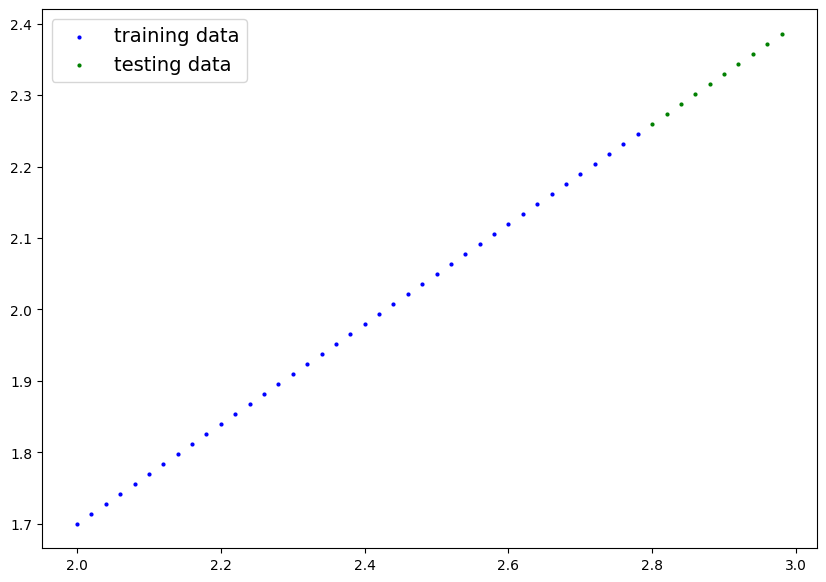

In [67]:
#导入PyTorch和matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

#设置设备无关代码
device="cuda" if torch.cuda.is_available() else "cpu"
#print(f"Using device:{device}")

weight=0.7
bias=0.3

start=2
end=3
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
#print(X[:10],y[:10])

train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

#print(len(X_train),len(y_train),len(X_test),len(y_test))

plot_predictions(X_train,y_train,X_test,y_test)

In [68]:
def plot_predictions( train_data=X_train.cpu(),
            train_labels=y_train.cpu(),
            test_data=X_test.cpu(),
            test_labels=y_test.cpu(),
            predictions=None):
  """
  绘制训练数据，测试数据 并且比较预测值
  """
  plt.figure(figsize=(10,7))#创建图形窗口
  #用蓝色绘制训练数据
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")

  #用绿色绘制测试数据
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")

  if predictions is not None:
    #用红色绘制预测数据
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  plt.legend(prop={"size":14})#显示图例

###使用nn.Paramete建立线性回归模型和使用nn.Linear建立线性回归模型

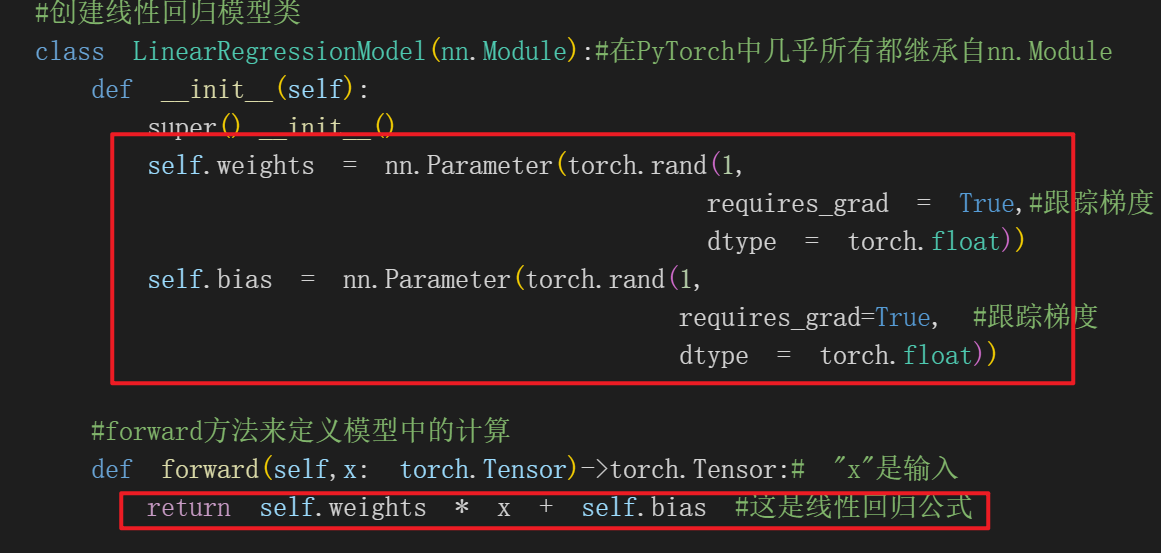


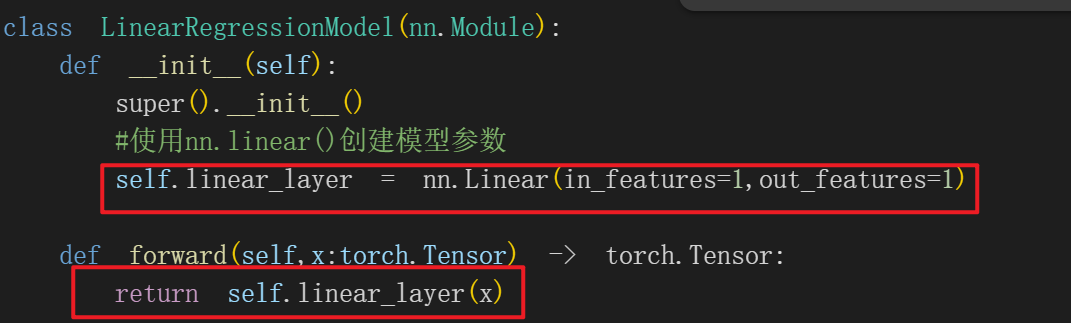

In [69]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #使用nn.linear()创建模型参数,为一个随机权重和偏差参数
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#设置手动种子
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [70]:
next(model_1.parameters()).device

device(type='cpu')

In [71]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

###损失函数和优化器的创建

In [72]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

###训练循环和测试循环

In [ ]:
torch.manual_seed(42)

epochs=1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  #training
  model_1.train()

  y_pred = model_1(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_1.eval()
  with torch.no_grad():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 100 == 0:
    print(f"Epoch:{epoch} | Train loss:{loss} | Test loss: {test_loss}")


Epoch:0 | Train loss:0.684255063533783 | Test loss: 0.6374533772468567
Epoch:100 | Train loss:0.030321670696139336 | Test loss: 0.06925635784864426
Epoch:200 | Train loss:0.024437233805656433 | Test loss: 0.05592718347907066
Epoch:300 | Train loss:0.018552793189883232 | Test loss: 0.04259798675775528


In [ ]:
from pprint import pprint
print("The model learned the following values for weight and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weight and bias were:")
print(f"weight:{weight},bias:{bias}")

In [ ]:
###做出预测

model_1.eval()

with torch.inference_mode():
  y_preds=model_1(X_test)

y_preds


In [ ]:
plot_predictions(predictions=y_preds.cpu())

###备注：在训练该模型时，初始时设置的学习率为0.01，导致误差较大，经过多轮次学习无法达到理想学习效果，通过修改学习率，将其改为0.001左右，再次训练该模型，最终使模型达到理想训练效果。




###保存和加载模型

In [ ]:
from pathlib import Path
#保存
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
#加载
loaded_model_1=LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)
print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

In [ ]:
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds == y_preds

###Exercises

1.使用线性回归公式创建直线数据集

In [ ]:
weight=0.3
bias=0.9

start=0
end=10
step=0.01

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X+bias

train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]


In [ ]:
###可视化
import matplotlib.pyplot as plt
def plot_predictions(train_data = X_train.cpu(),train_lables = y_train.cpu(),test_data = X_test.cpu(),test_labels = y_test.cpu(),predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(X_train,y_train,c="y",label="train data",s=5)
  plt.scatter(X_test,y_test,c='b',label="test data",s=5)

  if predictions is not None:
    plt.scatter(X_test,predictions,c="r",label="prediction data",s=5)

  plt.legend(prop={"size":14})

plot_predictions(X_train,y_train,X_test,y_test)
print(X_test.shape,y_test.shape)

2.通过nn.Module子类来构建PyTorch模型

In [ ]:
import torch
from torch import nn

torch.manual_seed(77)
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    # self.weight = nn.Paramter(torch.rand(1,requires_grad=True))
    # self.bias = nn.Parameter(torch.rand(1,requires_grad=True))
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor):
    #return self.weight*x+self.bias
    return self.linear_layer(x)

model_k=LinearRegressionModelV3()
#model_k.state_dict()
model_k.parameters()

3.分别使用nn.L1Loss()和torch.optim.SGD(params,lr)创建损失函数和优化器

4.使用经过训练的模型对测试数据进行预测

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_k.parameters(),lr=0.01)

epochs = 300

for epoch in range(epochs):
  #training

  model_k.train()

  y_pred = model_k(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 20 == 0 :
    #testing
    model_k.eval()

    with torch.inference_mode():
      y_test_preds = model_k(X_test)
      loss_test=loss_fn(y_test_preds,y_test)

      print(f"epoch:{epoch} | train loss:{loss} | test loss: {test_loss}")

model_k.eval()
with torch.inference_mode():
  y_preds_k = model_k(X_test)

print(y_preds_k.shape,X_test.shape)
plot_predictions(predictions=y_preds_k.cpu())

5.将训练模型的state_dict()保存到文件

In [ ]:
MODEL_PATH = Path("model_k")
MODEL_PATH.mkdir(parents = True,exist_ok=True)

MODEL_NAME = "01_PyTorch_workflow_exercise.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_k.state_dict(),f=MODEL_SAVE_PATH)

model_o = LinearRegressionModelV3()
model_o.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model_o.eval()
with torch.inference_mode():
  y_preds_o = model_o(X_test)

plot_predictions(predictions=y_preds_o.cpu())

In [ ]:
torch.__version__

In [ ]:
del x, y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation function
def loss_surface(x):
    return np.power(x,4)+ np.power(x,3) - 6*np.power(x,2)
#Define the gradient function
def parabola_grad(x):
    return 4*np.power(x,3)+3*np.power(x,2)-12*x
# Select a random start point in the axis range
x0 = np.random.uniform(-3,3)
# Specify the learning rate
lr=0.04

# Initialize a list to keep track of the gradient descent points
x_l = [x0]

#Perform gradient descent
for i in range(10):
    # Update the x0 value
    x0=x0-parabola_grad(x0)*lr
    # Add points to the list
    x_l.append(x0)
x_l = np.array(x_l)
y_l = loss_surface(x_l)

x=np.linspace(-3,3,100)
y=loss_surface(x)

# Plot the curve and points
plt.plot(x,y);
plt.plot(x_l[0],y_l[0],'rx',label="Random initilization");
plt.plot(x_l[-1],y_l[-1],'kx',label="Stop Point");
plt.plot(x_l,y_l,'r-');
plt.legend()

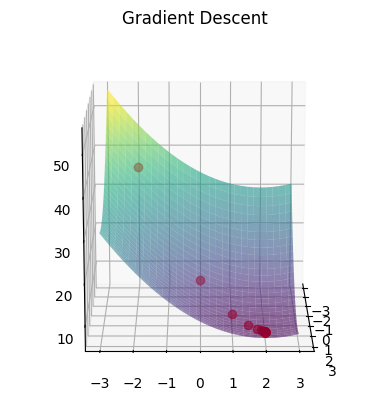

In [26]:
#import the libraries
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
from sympy import symbols,lambdify,diff
import matplotlib.pyplot as plt

# Define the sympy symbols to be used in the function
x = symbols('x')
y = symbols('y')
#Define the function in terms of x and y
f1 = (x-2) ** 2 + (y-2)**2+5

# Calculate the partial derivatives of f1 w.r.t. x and y
f1x = diff(f1,x)
f1y = diff(f1,y)

# Define a function optimized for numpy array calculation
# in sympy
f = lambdify([x,y],f1,'numpy')

# Define the x and y grid arrays
x_grid = np.linspace(-3, 3, 30)
y_grid = np.linspace(-3, 3, 30)
# Create mesh grid for surface plot
X, Y = np.meshgrid(x_grid,y_grid)

#Define the surface function using the lambdify function
Z = f(X,Y)

#Select a start point
x0,y0 = (-2,-2)
#Initialize a list for storing the gradient descent points
xlist = [x0]
ylist = [y0]

#Specify the learning rate
lr=0.25

#Perform gradient descent
for i in range(100):
    # Update the x and y values using the negative gradient values
    grad_x = float(f1x.evalf(subs={x:x0,y:y0}))
    grad_y = float(f1y.evalf(subs={x:x0,y:y0}))
    x0 -= grad_x * lr
    y0 -= grad_y * lr
    # Append to the list to keep track of the points
    xlist.append(float(x0))
    ylist.append(float(y0))

xarr = np.array(xlist,dtype='float64')
yarr = np.array(ylist,dtype='float64')
zlist = np.array(f(xarr, yarr), dtype='float64')

#Plot the surface and points
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',alpha=0.6)
# ax.plot(xlist,ylist,zlist,markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10, alpha=0.6)
ax.plot3D(xarr,yarr,zlist,'ro',markersize=6,alpha=0.6)
ax.set_title('Gradient Descent');
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=15, azim=0)

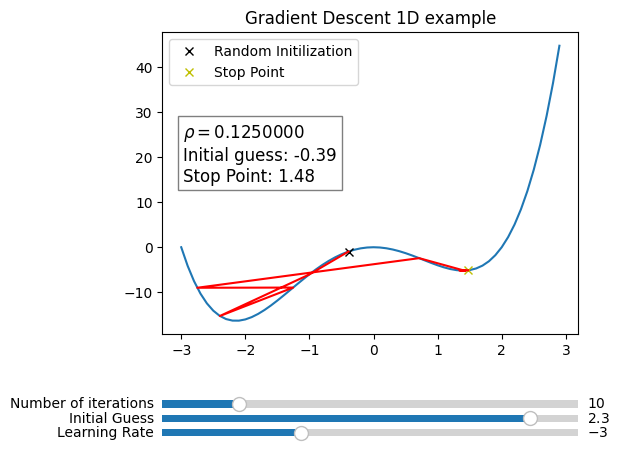

In [16]:
from matplotlib.widgets import Slider
from sympy import symbols
from sympy import diff
from sympy import solve
import sympy
import numpy as np
from sympy import lambdify
import matplotlib.pyplot as plt


def grad_descent_1d(lr=0.01,x0=2.7,n=10):
    # np.random.seed(3000)
#     x0=np.random.uniform(-3,3)
    x0 = x0
    # x0 = 2.8
    f = lambdify(x,y,'numpy')
    x_arr = np.arange(-3,3,0.1)
    y_arr = f(x_arr)
    lr=lr
    x_l = [x0]
    for i in range(int(n)):
        x0=x0-y1.evalf(subs={x:x0})*lr
        x_l.append(x0)
    x_l = np.array(x_l)
    y_l = f(x_l)
    return x_arr,y_arr,x_l,y_l

x = symbols('x')
y = x**4+x**3-6*x**2
y1 = diff(y)

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
lr=0.125
x0 = 2.8
x_arr,y_arr,x_l,y_l = grad_descent_1d(lr=0.1258925,x0 = -0.39,n=10)
ax.plot(x_arr,y_arr)
ax.plot(x_l[0],y_l[0],'kx',label='Random Initilization');
ax.plot(x_l[-1],y_l[-1],'yx',label='Stop Point');
ax.plot(x_l,y_l,'r-');
ax.legend()
ax.set_title(f'Gradient Descent 1D example');
textstr = '\n'.join([fr'$\rho = {lr:.7f}$',fr'Initial guess: {float(x_l[0]):.2f}',fr'Stop Point: {float(x_l[-1]):.2f}'])
props = dict(boxstyle='square', facecolor='white', alpha=0.5)
ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=12,
		verticalalignment='top', bbox=props);

axcolor = 'lightgoldenrodyellow'
axlr = plt.axes([0.25, 0.03, 0.65, 0.03], facecolor=axcolor)
axx0 = plt.axes([0.25, 0.06, 0.65, 0.03], facecolor=axcolor)
axnos = plt.axes([0.25, 0.09, 0.65, 0.03], facecolor=axcolor)
slr = Slider(axlr, 'Learning Rate', -5, 1, valinit=-3,valstep=0.1)
sx0 = Slider(axx0, 'Initial Guess', -3, 3, valinit=2.3,valstep=0.01)
sxnos = Slider(axnos, 'Number of iterations', 1, 50, valinit=10,valstep=1)




def update(val):
	ax.cla()
	lr = 10**slr.val
	slr.valtext.set_text(f'{lr:.4E}')
	n = sxnos.val
	x0 = sx0.val
	x_arr,y_arr,x_l,y_l = grad_descent_1d(lr=lr,x0 = x0,n=n)
	# plt.autoscale()
	ax.plot(x_arr,y_arr)
	ax.plot(x_l[0],y_l[0],'kx',label='Random Initilization');
	ax.plot(x_l[-1],y_l[-1],'yx',label='Stop Point');
	ax.plot(x_l,y_l,'r-');
	ax.legend()
	ax.set_title(f'Gradient Descent 1D example');
	textstr = '\n'.join([fr'$\rho = {lr:.7f}$',fr'Initial guess: {float(x_l[0]):.2f}',fr'Stop Point: {float(x_l[-1]):.2f}'])
	props = dict(boxstyle='square', facecolor='white', alpha=0.5)
	ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=12,
			verticalalignment='top', bbox=props);

slr.on_changed(update)
sx0.on_changed(update)
sxnos.on_changed(update)

plt.show()